![car](car.jpg)

Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

They have supplied you with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



## The dataset

| Column | Description |
|--------|-------------|
| `id` | Unique client identifier |
| `age` | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code | 
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client | 
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [56]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Start coding!

# Load Data

In [57]:
# Read in CSV and drop the id column
df_car_insurance = pd.read_csv('car_insurance.csv')
df_car_insurance.drop('id', axis=1, inplace=True)

# Show info
print(df_car_insurance.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  int64  
 1   gender               10000 non-null  int64  
 2   driving_experience   10000 non-null  object 
 3   education            10000 non-null  object 
 4   income               10000 non-null  object 
 5   credit_score         9018 non-null   float64
 6   vehicle_ownership    10000 non-null  float64
 7   vehicle_year         10000 non-null  object 
 8   married              10000 non-null  float64
 9   children             10000 non-null  float64
 10  postal_code          10000 non-null  int64  
 11  annual_mileage       9043 non-null   float64
 12  vehicle_type         10000 non-null  object 
 13  speeding_violations  10000 non-null  int64  
 14  duis                 10000 non-null  int64  
 15  past_accidents       10000 non-null  

In [58]:
# Check for missing values and replace
# Fill missing values with the mean
df_car_insurance["credit_score"].fillna(df_car_insurance["credit_score"].mean(), inplace=True)
df_car_insurance["annual_mileage"].fillna(df_car_insurance["annual_mileage"].mean(), inplace=True)


# Run all data features into model and record the accuracy into a dataset

In [59]:
# Accuracy Function
def accuracy(mdl):
    """ Receives a logit model and returns the accuracy metric as a decimal (float)"""
    conf_matrix = mdl.pred_table()
    TN = conf_matrix[0,0]
    TP = conf_matrix[1,1]
    FN = conf_matrix[1,0]
    FP = conf_matrix[0,1]

    accuracy = (TN + TP) / (TN + TP + FN + FP)
    return accuracy

In [60]:
# create a list of features from the column names and exclude outcome
features = list(df_car_insurance.columns)
features.remove('outcome')

# Init a dictionary to record the accuracy of each feature
dict_accuracy = {}

# Loop to go through each feature
for feature in features:
    # Create a model
    mdl_car_insurance = logit("outcome ~"+feature, data=df_car_insurance).fit()
    
    # Capture the accuracy  and Add to a dict
    dict_accuracy[feature] = accuracy(mdl_car_insurance)


Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

# Store as a DataFrame called best_feature_df

In [61]:
# Convert dict_accuracy to a dataframe
best_feature_df = pd.DataFrame.from_dict(dict_accuracy, orient='index', columns=['best_accuracy'])

# Add a column for best_feature
best_feature_df['best_feature'] = best_feature_df.index

# Reset the index
best_feature_df.reset_index(drop=True, inplace=True)

# Reorder the columns
best_feature_df = best_feature_df[['best_feature', 'best_accuracy']]

# Sort by accuracy
best_feature_df.sort_values(by='best_accuracy', ascending=False, inplace=True)

# Capture the best feature
best_feature_df = best_feature_df.head(1)

# Best Feature
print(f"The best feature is {best_feature_df['best_feature'].values[0]} with accuracy of {best_feature_df['best_accuracy'].values[0]}.")

The best feature is driving_experience with accuracy of 0.7771.


In [62]:
best_feature_df

,best_feature,best_accuracy
2,driving_experience,0.7771


# Show EDA for all features

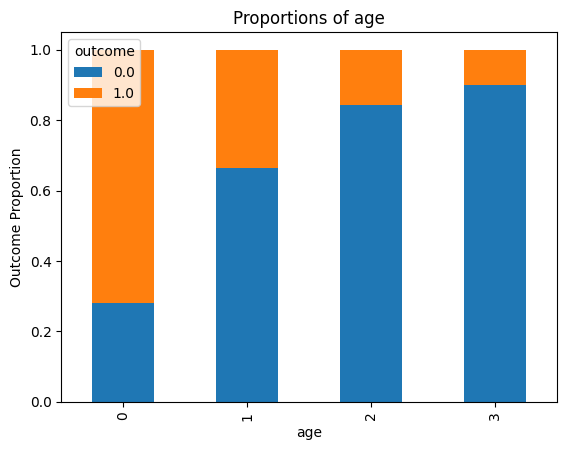

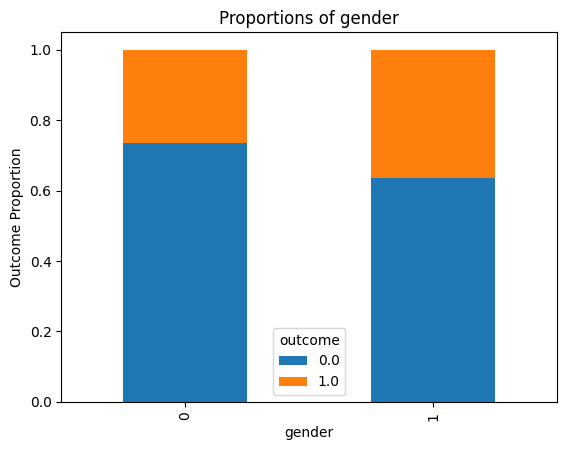

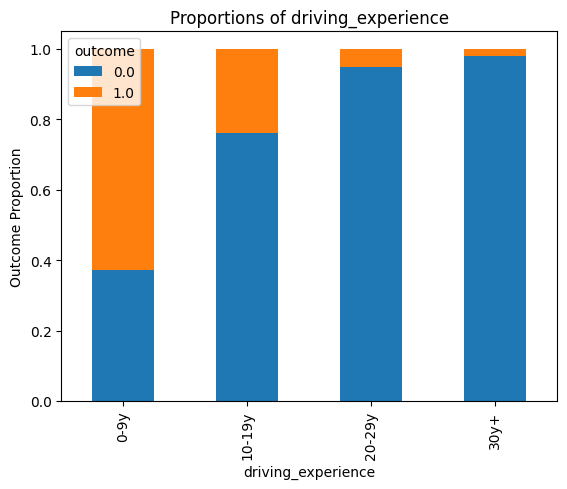

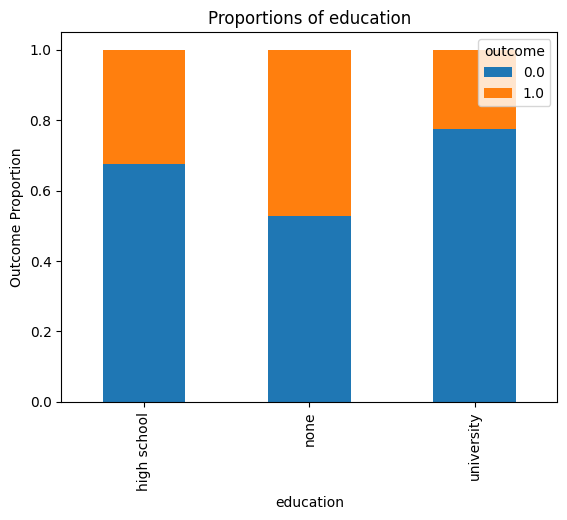

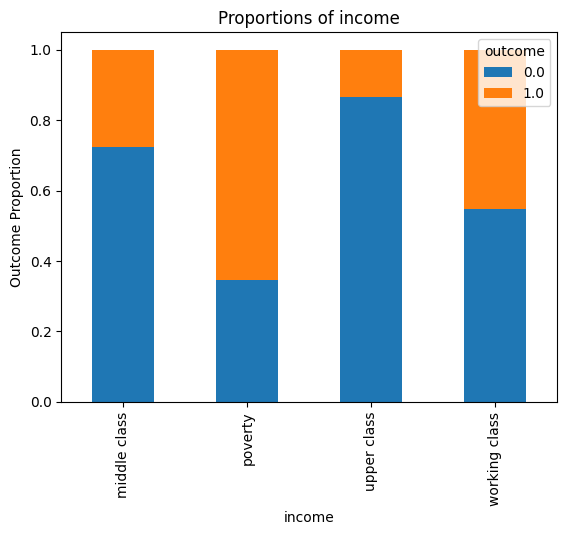

In [54]:
import matplotlib.pyplot as plt

# Loop through each column in df_car_insurance
for column in df_car_insurance.columns:
    # Skip the outcome column
    if column == 'outcome':
        continue
    
    # Create a figure and axes
    fig, ax = plt.subplots()
    
    # Calculate the proportions of the outcome variable
    outcome_proportions = df_car_insurance.groupby(column)['outcome'].value_counts(normalize=True).unstack()
    
    # Plot the stacked bar chart of the proportions of the outcome variable
    outcome_proportions.plot(kind='bar', stacked=True, ax=ax)
    
    # Set the labels and title
    ax.set_xlabel(column)
    ax.set_ylabel('Outcome Proportion')
    ax.set_title(f'Proportions of {column}')
    
    # Show the plot
    plt.show()